In [66]:
from Py6S import *
import numpy as np

In [67]:
# Parameters
wind_speed = 5
wind_azimuth = 0
salinity = 34.3
pigmentation = 0.3

# Boundary Parameters
max_outgoing_zenith = 89
resolution = 25

In [68]:
s = SixS()
s.wavelength = Wavelength(2.2)
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
#s.ground_reflectance = GroundReflectance.HomogeneousLambertian(0.5)
s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_azimuth, salinity, pigmentation)

In [69]:
# Run 6S for a variety of geometries
outgoing_azimuth = 180
outgoing_zeniths = np.linspace(0, np.deg2rad(max_outgoing_zenith), max_outgoing_zenith)    


incoming_azimuth = 0
incoming_zeniths = np.linspace(0, np.deg2rad(89), 360)

In [70]:
dataset = {}

# Loop over tuple of outgoing azimuths and zeniths
idx = 0
max_idx = len(incoming_zeniths)
for incoming_zenith in incoming_zeniths:
    reflectances = {}
    for outgoing_zenith in outgoing_zeniths:
        s.geometry = Geometry.User()
        s.geometry.solar_z = np.rad2deg(incoming_zenith)
        s.geometry.solar_a = np.rad2deg(incoming_azimuth)
        s.geometry.view_z = np.rad2deg(outgoing_zenith)
        s.geometry.view_a = np.rad2deg(outgoing_azimuth)
        s.run()
        reflectances[outgoing_zenith] = s.outputs.values['apparent_reflectance']
    dataset[incoming_zenith] = reflectances
    idx += 1
    print(f"Progress: {idx}/{max_idx}")


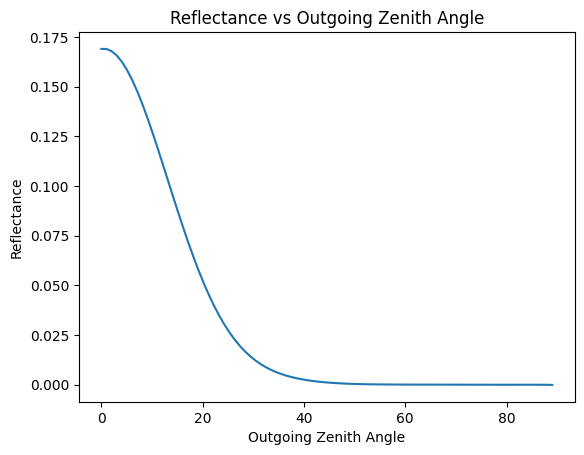

In [71]:
'''
# Plot the reflectances
import matplotlib.pyplot as plt

# Convert incoming zeniths to degrees
zenith_labels = np.rad2deg(outgoing_zeniths)

plt.plot(zenith_labels, [reflectances[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Outgoing Zenith Angle')
plt.ylabel('Reflectance')
plt.title('Reflectance vs Outgoing Zenith Angle')
plt.show()
'''